Generate random data, consider n=500 observations (i=1,...,500), from a predefined linear regression model with
m=20 variables (j=1,...,20). Assume that the regression coefficients are integers so that −5 ≤ β j ≤ 5. Assume also
independent normal residuals.

In [56]:
import numpy as np

# Number of observations
nsample = 500

# Number of variables
nvariables = 20

#Create an vector of one's
X0 = np.ones([nsample, 1])

#Create the random data for the matrix X
X1 = np.random.uniform(0, 10, ([nsample, nvariables]) )

# Concatenate the vector of one's to the matrix X
X = np.concatenate([X0, X1], axis=1)

# Generate a random vector of erros
error = np.random.normal(0,1, (nsample, 1))

# Generate a random vector of Beta's with values between -5 and 5
beta = np.random.randint(-5, 5, size=([nvariables+1, 1]))

nn = Y.shape
print nn
print type (( abs (Y[2] - beta[3] * X[2,3]) )[0] )

# Generate a random vector Y using the previous calculated values.
Y = np.dot(X, beta) +  error

# Uncomment to show the generated random matrix or vectors. 
# print X
# print beta
# print Y


(500, 1)
<type 'numpy.float64'>


Lets plot the random generated data.

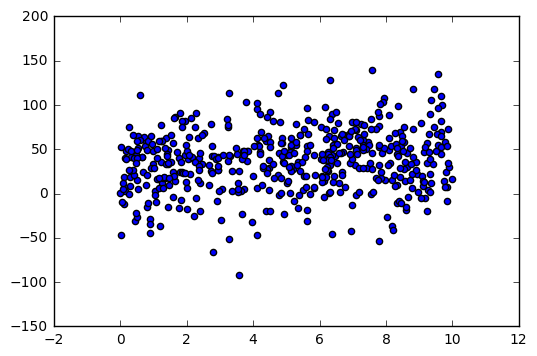

In [5]:
import matplotlib.pyplot as  plt

%matplotlib inline
plt.scatter(X[:,1], Y)

<b> Question A </b>

<i> Estimate the value of the regression coefficients by using the analytical solution for the least squares
estimation problem. </i>

It can be solve using the following equation:
    Beta = ((X' X)^(-1))  X' Y
    
In the code left  = ((X' X)^(-1)) and right = X' Y

In [6]:
# 

left  = np.linalg.inv(np.dot(X.transpose(), X))
right = np.dot(X.transpose(), Y)

Beta = np.dot(left, right)

print Beta


[[-0.88931346]
 [ 2.00179571]
 [-2.98919792]
 [-1.01006944]
 [-0.0242145 ]
 [-0.01463063]
 [ 0.96265829]
 [ 3.0081879 ]
 [ 0.97933734]
 [-4.97443102]
 [-4.9931385 ]
 [ 2.00333663]
 [ 2.01606561]
 [ 2.99151228]
 [-3.97029196]
 [ 4.00903659]
 [ 3.0110056 ]
 [-1.01378409]
 [ 0.9925459 ]
 [ 0.99923628]
 [ 3.98632518]]


<b> Question B </b>

<i> As an alternative, the least absolute value approach seeks to find the values of β by solving the following
problem: min ( Sum ( Yi - Beta Xi) )


Propose and implement in Pyomo an equivalent linear formulation for this problem. Compare the resulting
β coefficients with the ones obtained in a). </i>

\begin{align*}
\underset{x_{i}}{\min} & \quad \sum_{i=1}^{n}\sum_{j=1}^{m}|y_{i}-\beta'x_{i,j}|
\\\text{s.t.:}&\\
  &\beta'_{i} > -5  \quad \forall i\\
  &\beta'_{i} < 5 \quad \forall i\\
\end{align*}



In [92]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

opt = SolverFactory("glpk")

model = AbstractModel()

model.I = RangeSet(1,nsample)
model.J = RangeSet(1,nvariables)

model.beta = Var(model.J, domain=Reals)

# Objective Function
def obj_function(model):
    return sum(sum(((Y[i-1] - model.beta[j] * X[i-1,j-1]))[0] for i in model.I) for j in model.J)

model.OBJ = Objective(rule = obj_function)


# Constraints
def const1(model, j):
    return model.beta[j] >= -5

model.cons1 = Constraint(model.J, rule = const1)

def const2(model, j):
    return model.beta[j] <= 5

model.cons2 = Constraint(model.J, rule = const2)
    
    
instance = model.create_instance()

results = opt.solve(instance)

print results
print (instance.OBJ() )

    



Problem: 
- Name: unknown
  Lower bound: -772613.231351
  Upper bound: -772613.231351
  Number of objectives: 1
  Number of constraints: 41
  Number of variables: 21
  Number of nonzeros: 41
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0118298530579
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

-772613.231351


In [80]:

OF_vec = np.zeros(20)
for cont in range (0,20):
    w = np.random.uniform(0, 20, ([nsample,nvariables]))
    instance = model.create_instance()
    opt.solve(instance)
    OF_vec[cont] = instance.OBJ()
    
print OF_vec

[-772613.23135075 -772613.23135075 -772613.23135075 -772613.23135075
 -772613.23135075 -772613.23135075 -772613.23135075 -772613.23135075
 -772613.23135075 -772613.23135075 -772613.23135075 -772613.23135075
 -772613.23135075 -772613.23135075 -772613.23135075 -772613.23135075
 -772613.23135075 -772613.23135075 -772613.23135075 -772613.23135075]


Question C

Question D

Question E